<a href="https://colab.research.google.com/github/Katlego-DataLab/Website/blob/main/volatility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to forecast stock market volatility using historical price data in order to estimate future levels of market uncertainty. Volatility, measured as the rolling standard deviation of returns, represents financial risk and the magnitude of price fluctuations rather than the direction of price movement. Since financial markets are inherently unpredictable, investors and institutions require structured methods to manage risk exposure. The central question addressed is whether historical price behavior can be used to predict short-term volatility.

To answer this, historical daily closing prices for AAPL were collected from Yahoo Finance using Python. Daily returns were calculated, and a 21-day rolling standard deviation was computed to estimate monthly volatility. Missing values from rolling calculations were removed, and the dataset was kept in chronological order to preserve time-series integrity. A Linear Regression model was then trained using an 80/20 chronological train-test split to avoid data leakage. Model performance was evaluated using Mean Squared Error (MSE), R-squared (R^2), and a visual comparison of actual versus predicted volatility.

Overall, the project demonstrates the application of time-series analysis and regression modeling to transform raw market data into meaningful risk insights for financial decision-making.


/tmp/ipython-input-171132770.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.412383  6.427064  6.363543  6.395004  493729600
2010-01-05  6.423468  6.459723  6.389610  6.430060  601904800
2010-01-06  6.321296  6.448939  6.314704  6.423470  552160000
2010-01-07  6.309610  6.352158  6.263767  6.344667  477131200
2010-01-08  6.351558  6.352157  6.264067  6.301220  447610800


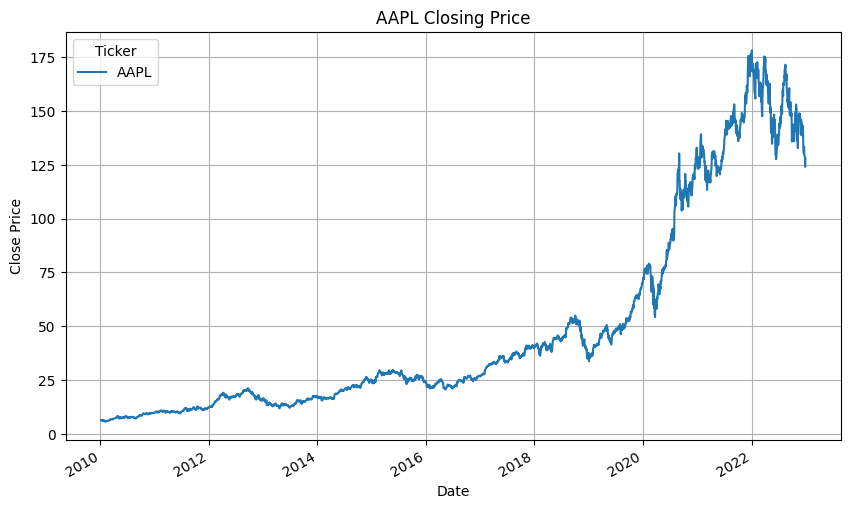

Training Data Shape: (2600, 1)
Testing Data Shape: (651, 1)
Mean Squared Error: 5.415366725481924e-05
R-squared: -0.38018015269712757


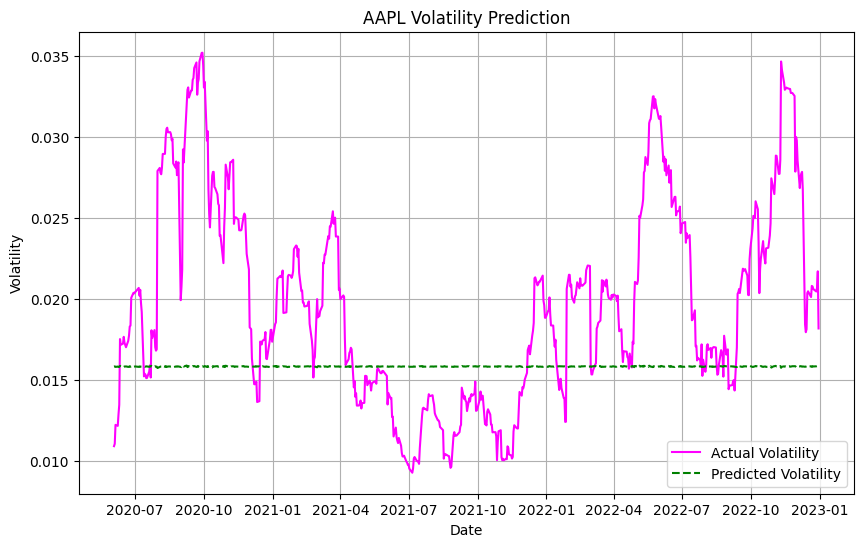

In [ ]:
## 1. Installing required libraries
!pip install yfinance pandas numpy matplotlib scikit-learn

## 2.Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 3. Download historical data for a stock (AAPL)
symbol = 'AAPL'  # Stock symbol for Apple
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download the stock data using yfinance
data = yf.download(symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

## 4. Plot the closing price of the stock
data['Close'].plot(figsize=(10, 6))
plt.title(f'{symbol} Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

##5. Create new columns for daily returns and volatility
data['Daily Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily Return'].rolling(window=21).std()  # 21-day rolling volatility (1 month)

# Drop the missing values from the calculated columns
data = data.dropna()

## 6. Prepare features (X) and target (y) for training the model
X = data[['Daily Return']]  # Features-daily returns
y = data['Volatility']     # Target-volatility

## 7.  Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print the shape of training and testing data to verify split
print(f'Training Data Shape: {X_train.shape}')
print(f'Testing Data Shape: {X_test.shape}')

## 8. Train a linear regression model
model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)  # Train the model on the training data

## 9. Predict volatility on the test set
y_pred = model.predict(X_test)

## 10. Evaluating the model's performance using mean squared error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printed the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

## 11. Plot actual vs predicted volatility for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Volatility', color="magenta")
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Volatility', color="green", linestyle='--')
plt.legend()
plt.title(f'{symbol} Volatility Prediction')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()
